# Goals
The notebook introduces you to pandas dataframes and their use cases. You can use the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html">internet</a> to learn about their various functionalities.

It also introduces you to different transformation methods for data.

Error analysis and smoothing is also shown here.

# Sqrt Transform

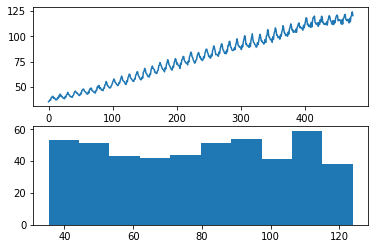

In [6]:
from numpy import sqrt
from pandas import DataFrame
from pandas import read_excel
from matplotlib import pyplot
series = read_excel('Electricity.xls',
              sheet_name='Data', header=0,
              index_col=0, parse_dates=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['electricity']
dataframe['electricity'] = sqrt(dataframe['electricity'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['electricity'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['electricity'])
pyplot.show()

In [ ]:
# Shahid: Use the hist method of dataframe and plot electricity column

# Log Transform

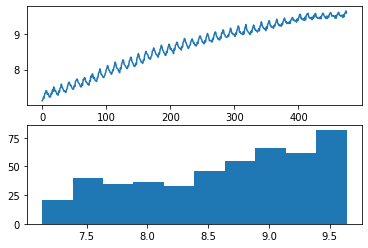

In [7]:
from numpy import log
series = read_excel('Electricity.xls',
              sheet_name='Data', header=0,
              index_col=0, parse_dates=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['electricity']
dataframe['electricity'] = log(dataframe['electricity'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['electricity'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['electricity'])
pyplot.show()

In [2]:
# Shahid: Also do z-score transform. Convert the pandas data frame to numpy array and use the z-score function provided to you in previous exercises

# Calendar adjustments
If data is for calendar months, then account might have to be taken of the length of a month. The difference between the longest and shortest months is about $\frac{(31- 28)}{30} = 10\%$. The adjustment needed is

$$
W_t = \frac{\text{# of days in an average month}}{\text{# of days in month } i} \times Y_t = \frac{365.25/12}{\text{# of days in month } i} \times Y_t
$$


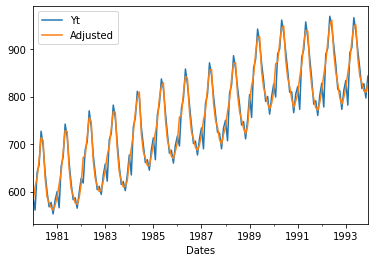

In [9]:
series = read_excel('MilkProduction.xls',
              sheet_name='AdjustedData', header=0,
              index_col=0, parse_dates=True)  # you can include various other parameters
series.plot()
pyplot.show()

# Accuracy Analysis


The forecaster needs to choose the best model to use for forecasting any particular time series. We discuss here different measures for comparing different forecasting models on the basis of forecasting errors. Let $F_t$ be the forecast value and $Y_t$ be the actual observation at time $t$. Then the forecast error at time $t$ is defined as $e_t = Y_t - F_t$.


Usually $F_t$ is calculated from previous values of $Y_t$ right up to and including the immediate preceding value $Y_{t-1}$. Thus $F_t$ predicts just one step ahead. In this case $F_t$ is called the **one-step forecast** and $e_t$ is called the **one-step forecast error**. Usually we assess error not from one such $e_t$ but from $n$ values. Three measures of error are:

* **Mean Error (ME)**:
$$
ME = \frac{1}{n} \sum_{t=1}^{n} e_t
$$

* **Mean Absolute Error (MAE)**:
$$
MAE = \frac{1}{n} \sum_{t=1}^{n} |e_t|
$$

* **Mean Square Error (MSE)**:
$$
MSE = \frac{1}{n} \sum_{t=1}^{n} e_t^2
$$


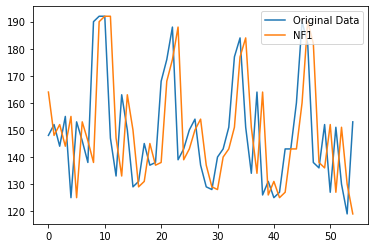

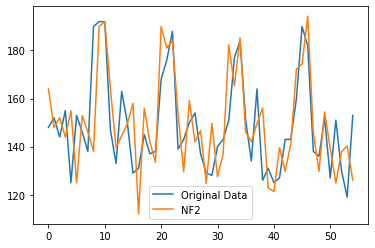

Summary of errors resulting from NF1 & NF2:
  Errors         NF1         NF2
0     ME   -0.200000   -0.981818
1    MAE   10.906290    8.762775
2    MSE  441.000000  261.563980
3    MPE   -1.088528   -1.200708
4   MAPE   10.906290    8.762775


In [10]:
# file ErrorMeasures.py

AustralianBeer  = read_excel('BeerErrorsData.xls', sheet_name='NF1NF2', usecols = [1],
                             header=0,  dtype=float)
AustralianBeer =AustralianBeer['Original Data']
NaiveF1  = read_excel('BeerErrorsData.xls', sheet_name='NF1NF2', usecols = [2],
                      header=0,  dtype=float)
NaiveF1 = NaiveF1['NF1']
NaiveF2 = read_excel('BeerErrorsData.xls', sheet_name='NF1NF2', usecols=[3],
                     header=0,  dtype=float)
NaiveF2 = NaiveF2['NF2']

# Joint plot of original data and NF1 forecasts
AustralianBeer.plot(legend=True)
NaiveF1.plot(legend=True)
pyplot.show()

# Joint plot of original data and NF2 forecasts
AustralianBeer.plot(legend=True)
NaiveF2.plot(legend=True)
pyplot.show()

# Evaluating the errors from both NF1 and NF2 methods
# Shahid Khan: Add manually the three errors
Error1 = AustralianBeer - NaiveF1
Error2 = AustralianBeer - NaiveF2
ME1 = sum(Error1)* 1.0/len(NaiveF1)
ME2 = sum(Error2)* 1.0/len(NaiveF2)
MAE1=sum(abs(Error1))*1.0/len(NaiveF1)
MAE2=sum(abs(Error2))*1.0/len(NaiveF2)
MSE1=sum(Error1**2)*1.0/len(NaiveF1)
MSE2=sum(Error2**2)*1.0/len(NaiveF2)

PercentageError1=(Error1/AustralianBeer)*100
PercentageError2=(Error2/AustralianBeer)*100
MPE1 = sum(PercentageError1)* 1.0/len(NaiveF1)
MPE2 = sum(PercentageError2)* 1.0/len(NaiveF2)
MAE1=sum(abs(PercentageError1))*1.0/len(NaiveF1)
MAE2=sum(abs(PercentageError2))*1.0/len(NaiveF2)


#Printing a summary of the errors in a tabular form
print('Summary of errors resulting from NF1 & NF2:')
import pandas as pd
cars = {'Errors': ['ME','MAE','MSE','MPE', 'MAPE'],
        'NF1': [ME1, MAE1, MSE1, MPE1, MAE1],
        'NF2': [ME2, MAE2, MSE2, MPE2, MAE2]
        }
AllErrors = pd.DataFrame(cars, columns = ['Errors', 'NF1', 'NF2'])
print(AllErrors)

# ACF of forecast error
It is often useful to regard the one-step forecast errors as a time series in its own right, and to calculate and plot the autocorrelation function (ACF) of this series. As mentioned above in the context
of the errors, one would want the errors generated by a forecast method to be completely/purely
random. If that is not the case, the ACF can retain some patterns observable in the original data set.
Hence, having the ACF not completely random can be an indication that the forecasting method is
not necessarily accurate

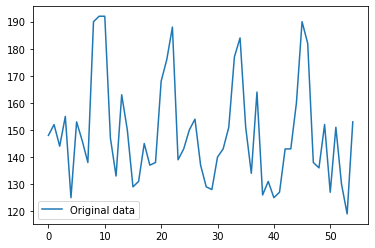

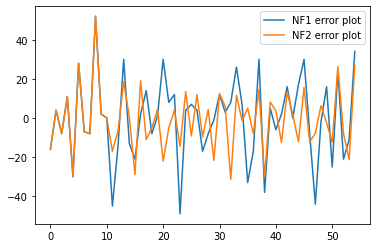

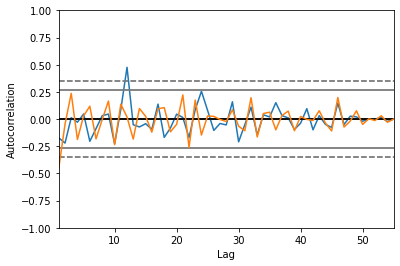

In [11]:
# file ACFErrors.py
AustralianBeer  = read_excel('BeerErrorsData.xls', sheet_name='NF1NF2', usecols = [1],
                             header=0,  dtype=float)
AustralianBeer =AustralianBeer['Original Data']
# Shahid: Import the other files while we give you the names of the files; find the sheet name; check yourself the sheet name; column information
NaiveF1  = read_excel('BeerErrorsData.xls', sheet_name='NF1NF2', usecols = [2],
                      header=0, dtype=float)
NaiveF1 = NaiveF1['NF1']
# same as above
NaiveF2 = read_excel('BeerErrorsData.xls', sheet_name='NF1NF2', usecols=[3],
                     header=0, dtype=float)
NaiveF2 = NaiveF2['NF2']

# Plot for the original data set
AustralianBeer.plot(label='Original data', legend=True)
pyplot.show()

# Evaluating the errors from both NF1 and NF2 methods
Error1 = AustralianBeer - NaiveF1
Error2 = AustralianBeer - NaiveF2

# Plot of the error time series
Error1.plot(label='NF1 error plot', legend=True)
Error2.plot(label='NF2 error plot', legend=True)
pyplot.show()

# Creating an autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(Error1)
autocorrelation_plot(Error2)
pyplot.show()

# Prediction Interval

Assuming that the errors are normally distributed, one can usefully assess the accuracy of a forecast by using MSE (Mean Squared Error) as an estimate of the error. An approximate prediction interval for the next observation is:

$$F_{t+1} ± z \sqrt{MSE},$$

where $z$ is a quantile of the normal distribution. Typical values used are:

| $z$   | Probability |
|-------|-------------|
| 1.282 | 0.80        |
| 1.645 | 0.90        |
| 1.960 | 0.95        |
| 2.576 | 0.99        |

This enables, for example, 95% or 99% confidence intervals to be set up for any forecast.


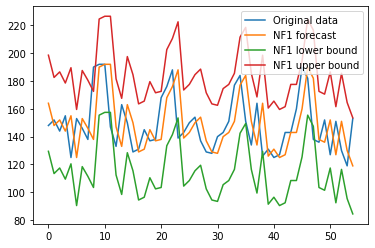

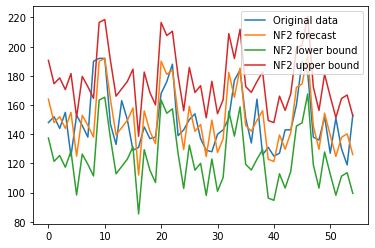

In [12]:
# file ConfidenceInterval.py
from numpy import sqrt
AustralianBeer  = read_excel('BeerErrorsData.xls', sheet_name='NF1NF2', usecols = [1],
                             header=0,  dtype=float)
AustralianBeer =AustralianBeer['Original Data']
NaiveF1  = read_excel('BeerErrorsData.xls', sheet_name='NF1NF2', usecols = [2],
                      header=0,  dtype=float)
NaiveF1 = NaiveF1['NF1']
NaiveF2 = read_excel('BeerErrorsData.xls', sheet_name='NF1NF2', usecols=[3],
                     header=0, dtype=float)
NaiveF2 = NaiveF2['NF2']



# Evaluating the errors from both NF1 and NF2 methods
# Shahid: Calculate the confidence (1.645) for NaiveF1 and NaiveF2
Error1 = AustralianBeer - NaiveF1
Error2 = AustralianBeer - NaiveF2
MSE1=sum(Error1**2)*1.0/len(NaiveF1)
MSE2=sum(Error2**2)*1.0/len(NaiveF2)

LowerForecast1 = NaiveF1 - 1.645*sqrt(MSE1)
UpperForecast1 = NaiveF1 + 1.645*sqrt(MSE1)

LowerForecast2 = NaiveF2 - 1.645*sqrt(MSE2)
UpperForecast2 = NaiveF2 + 1.645*sqrt(MSE2)

# Joint plot of original data and NF1 forecasts
AustralianBeer.plot(label='Original data')
NaiveF1.plot(label='NF1 forecast')
LowerForecast1.plot(label='NF1 lower bound')
UpperForecast1.plot(label='NF1 upper bound')
pyplot.legend()
pyplot.show()

# Joint plot of original data and NF2 forecasts
AustralianBeer.plot(label='Original data')
NaiveF2.plot(label='NF2 forecast')
LowerForecast2.plot(label='NF2 lower bound')
UpperForecast2.plot(label='NF2 upper bound')
pyplot.legend()
pyplot.show()

# Exponential smoothing

# Single Exponential Smoothing

The single exponential forecast or simple exponential smoothing (SES) is defined as:

$$F_{t+1} = \alpha Y_t + (1 - \alpha)F_t$$

where $\alpha$ is a given weight value to be selected subject to $0 \leq \alpha \leq 1$. Thus $F_{t+1}$ is the weighted average of the current observation, $Y_t$, with the forecast, $F_t$, made at the previous time point $t - 1$.

Repeated application of the formula yields:

$$F_{t+1} = (1 - \alpha)^t F_1 + \alpha \sum_{j=0}^{t-1} (1 - \alpha)^j Y_{t-j}$$

showing that the dependence of the current forecast on $Y_t$, $Y_{t-1}$, $Y_{t-2}$, ..., falls away in an exponential way. The rate at which this dependence falls away is controlled by $\alpha$. The larger the value of $\alpha$, the quicker does the dependence on previous values fall away.

SES needs to be initialized. A simple choice is to use $F_1 = Y_1$. Other values are possible, but we shall not agonise over this too much as we are more concerned with the behaviour of the forecast once it has been in use for a while.

It should be noted that, as with averaging methods, SES can only produce a one-step forecast.


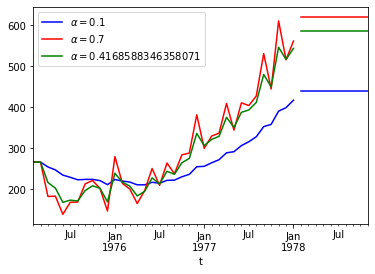

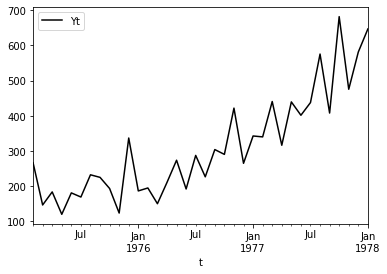

Summary of errors resulting from SES models 1, 2 & 3:
  Model   SES model 1  SES model 2  SES model 3
0   MSE  13349.118229  8032.361276  6878.753714


In [20]:
from pandas import read_excel
from statsmodels.tsa.api import SimpleExpSmoothing
from matplotlib import pyplot
series = read_excel('ShampooSales.xls', sheet_name='Data', header=0,
              index_col=0, parse_dates=True)
series.index.freq = 'MS'

# Simple Exponential Smoothing #

## SES model 1: alpha = 0.1
fit1 = SimpleExpSmoothing(series).fit(smoothing_level=0.1,optimized=False)
fcast1 = fit1.forecast(10).rename(r'$\alpha=0.1$')
# Plot of fitted values and forecast of next 10 values, respectively
fit1.fittedvalues.plot(color='blue')
fcast1.plot(color='blue', legend=True)

## SES model 2: alpha = 0.7
# Shahid: change the alpha between 0.1 and 0.9 do the fit
fit2 = SimpleExpSmoothing(series).fit(smoothing_level=0.7,optimized=False)
fcast2 = fit2.forecast(10).rename(r'$\alpha=0.7$')
# Plot of fitted values and forecast of next 10 values, respectively
fcast2.plot(color='red', legend=True)
fit2.fittedvalues.plot(color='red')

## SES model 3: alpha automatically selected by the built-in optimization software
fit3 = SimpleExpSmoothing(series).fit()
fcast3 = fit3.forecast(10).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# Plot of fitted values and forecast of next 10 values, respectively
fcast3.plot(color='green', legend=True)
fit3.fittedvalues.plot(color='green')

# Plotting the original data together with the 3 forecast plots
series.plot(color='black', legend=True)
pyplot.show()

#Evaluating the errors
from sklearn.metrics import mean_squared_error
MSE1=mean_squared_error(fit1.fittedvalues, series)
MSE2=mean_squared_error(fit2.fittedvalues, series)
MSE3=mean_squared_error(fit3.fittedvalues, series)

print('Summary of errors resulting from SES models 1, 2 & 3:')
import pandas as pd
cars = {'Model': ['MSE'],
        'SES model 1': [MSE1],
        'SES model 2': [MSE2],
        'SES model 3': [MSE3]
        }
AllErrors = pd.DataFrame(cars, columns = ['Model', 'SES model 1', 'SES model 2', 'SES model 3'])
print(AllErrors)

# Holt’s Linear Exponential Smoothing

The Holt method, also known as the linear exponential method (LES), was introduced by Charles Holt in 1957. It is an extension of the simple/single exponential smoothing method to take into account a possible (local) linear trend. The trend makes it possible to forecast m time periods ahead.

There are two smoothing constants $\alpha$ and $\beta$, $0 \leq \alpha, \beta \leq 1$. The equations are:

$$L_t = \alpha Y_t + (1 - \alpha)(L_{t-1} + b_{t-1})$$
$$b_t = \beta (L_t - L_{t-1}) + (1 - \beta)b_{t-1}$$
$$F_{t+m} = L_t + b_t m$$

Here $L_t$ and $b_t$ are respectively (exponentially smoothed) estimates of the level and linear trend of the series at time t, whilst $F_{t+m}$ is the linear forecast from t onwards.

Initial estimates are needed for $L_1$ and $b_1$. Simple choices are $L_1 = Y_1$ and $b_1 = 0$. If, however, zero is atypical of the initial slope, then a more careful estimate of the slope may be needed to ensure that the initial forecasts are not badly out.

It should be noted that to use this method, it is **not** necessary for a series to be completely linear, but some trend should be present.


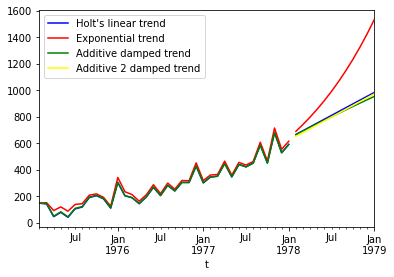

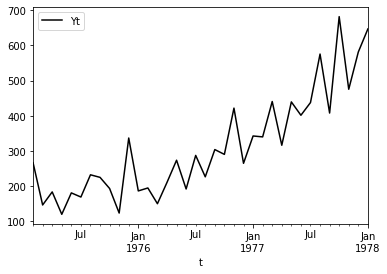

Summary of errors resulting from SES models 1, 2 & 3:
  Model   LES model 1   LES model 2   LES model 3
0   MSE  11170.064695  10884.753255  11050.435051


In [22]:
from pandas import read_excel
from statsmodels.tsa.api import Holt
from matplotlib import pyplot
series = read_excel('ShampooSales.xls', sheet_name='Data', header=0,
              index_col=0)
series.index.freq = 'MS'

# Holt model 1: alpha = 0.8, beta=0.2
fit1 = Holt(series).fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

fit2 = Holt(series, exponential=True).fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast2 = fit2.forecast(12).rename("Exponential trend")

fit3 = Holt(series, damped_trend=True).fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast3 = fit3.forecast(12).rename("Additive damped trend")

fit4 = Holt(series).fit(optimized=True)
fcast4 = fit4.forecast(12).rename("Additive 2 damped trend")


fit1.fittedvalues.plot(color='blue')
fcast1.plot(color='blue', legend=True)

fit2.fittedvalues.plot(color='red')
fcast2.plot(color='red', legend=True)

fit3.fittedvalues.plot(color='green')
fcast3.plot(color='green', legend=True)

fcast4.plot(color='yellow', legend=True)

series.plot(color='black', legend=True)
pyplot.show()

#Evaluating the errors
from sklearn.metrics import mean_squared_error
MSE1=mean_squared_error(fit1.fittedvalues, series)
MSE2=mean_squared_error(fit2.fittedvalues, series)
MSE3=mean_squared_error(fit3.fittedvalues, series)

print('Summary of errors resulting from SES models 1, 2 & 3:')
import pandas as pd
cars = {'Model': ['MSE'],
        'LES model 1': [MSE1],
        'LES model 2': [MSE2],
        'LES model 3': [MSE3]
        }
AllErrors = pd.DataFrame(cars, columns = ['Model', 'LES model 1', 'LES model 2', 'LES model 3'])
print(AllErrors)


# Holt-Winter’s Method with Additive Seasonality

The equations are:

$$L_t = \alpha(Y_t − S_{t−s} ) + (1 − \alpha)(L_{t−1} + b_{t−1} )$$
$$b_t = \beta (L_t − L_{t−1} ) + (1 − \beta )b_{t−1}$$
$$S_t = \gamma(Y_t − L_t ) + (1 − \gamma)S_{t−s}$$
$$F_{t+m} = L_t + b_t m + S_{t−s+m}$$

where $s$ is the number of periods in one cycle. The initial values of $L_s$ and $b_s$ can be as in the multiplicative case. The initial seasonal indices can be taken as:

$$S_k = Y_k − L_s , k = 1, 2, ..., s.$$

Similarly, the parameters $\alpha$, $\beta$ , $\gamma$ should lie in the interval [0, 1], and can again be selected by minimising MAE, MSE or MAPE.


<ipython-input-41-4819a98422cb>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = read_excel('CementProduction.xls', sheet_name='Data', header=0,


Forecasting Cement Production with Holt-Winters method


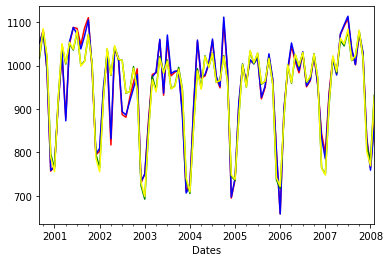

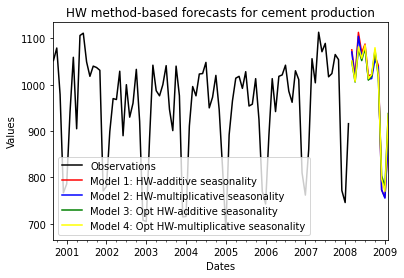

        HW model 1   HW model 2   HW model 3   HW model 4
alpha     0.300000     0.300000     0.210810     0.217048
beta      0.500000     0.500000     0.031486     0.034821
gamma     0.700000     0.700000     0.000178     0.000195
l0     1000.669690   952.853999   992.453613   986.171933
b0       -9.849307   -12.005419    -1.195759    -1.486152
MSE    2369.893702  2352.461999  1211.553151  1215.283734


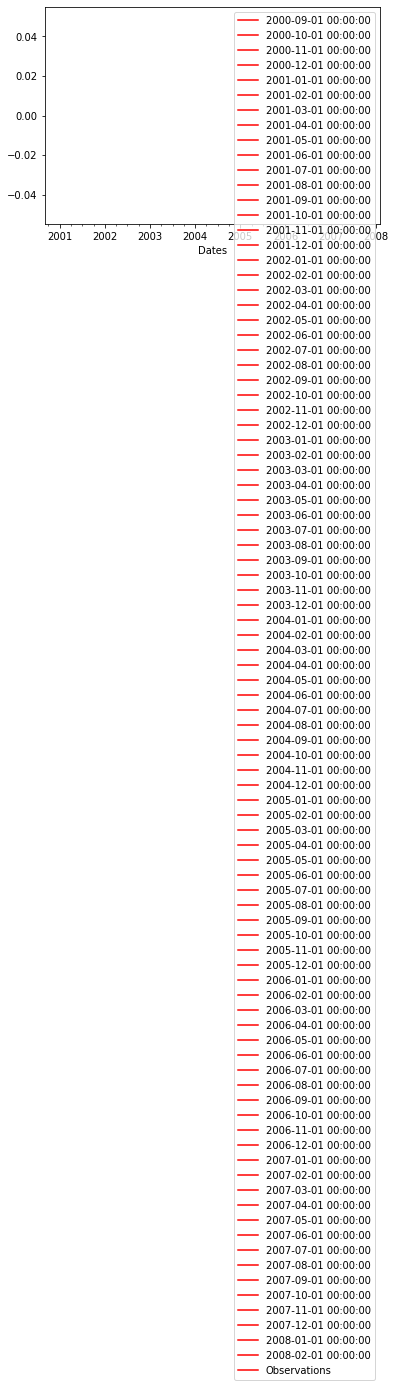

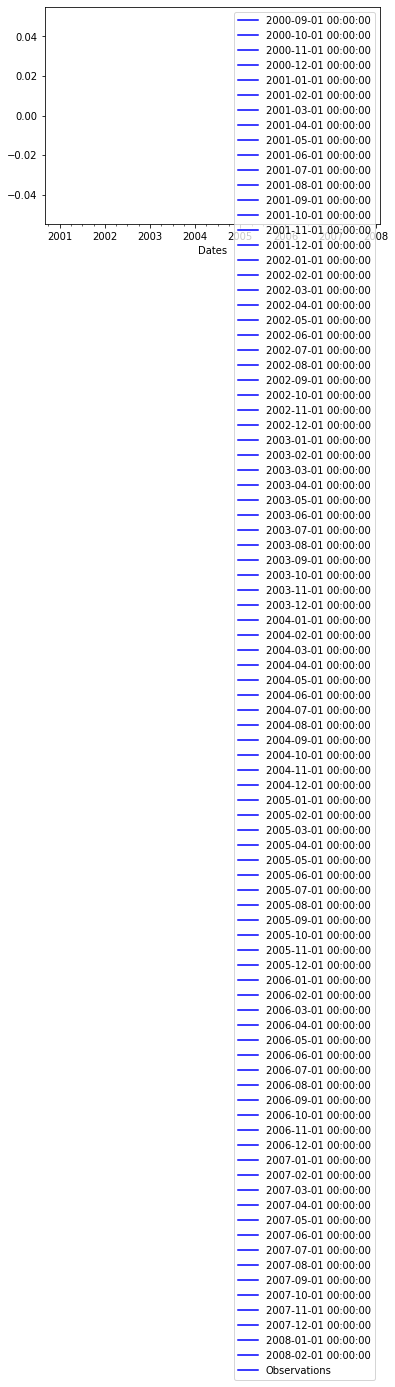

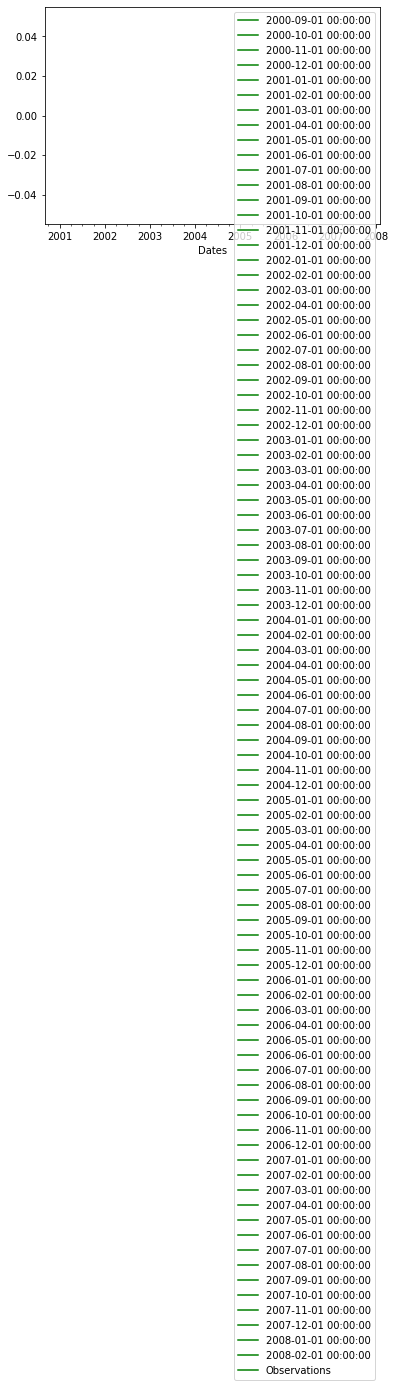

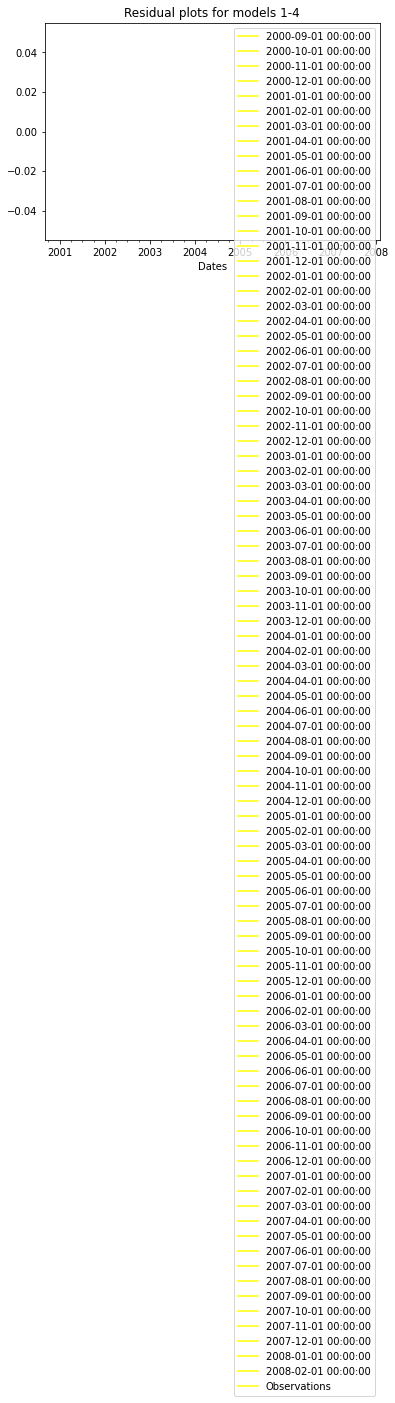

ValueError: x is required to have ndim 1 but has ndim 2

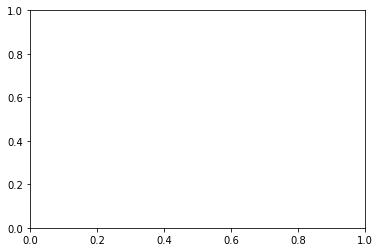

In [41]:

from pandas import read_excel
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
from matplotlib import pyplot
series = read_excel('CementProduction.xls', sheet_name='Data', header=0,
              index_col=0, parse_dates=True)
series.index.freq = 'MS'


# ===================================
# Holt-Winter method in different scenarios #
# ===================================
# ===================================
# Model 1: Holt-Winter method with additive trend and seasonality
# Here, alpha = 0.3, beta=0.5, gamma=0.7
# ===================================
fit1 = ExponentialSmoothing(series, seasonal_periods=12, trend='add', seasonal='add').fit(smoothing_level = 0.3, smoothing_trend=0.5,  smoothing_seasonal=0.7)
fit1.fittedvalues.plot(color='red')

# ===================================
# Model 2: Holt-Winter method with additive trend and multiplicative seasonality
# Here, alpha = 0.3, beta=0.5, gamma=0.7
# ===================================

# Shahid: do the multiplicative one
fit2 = ExponentialSmoothing(series, seasonal_periods=12, trend='add', seasonal='mul').fit(smoothing_level = 0.3, smoothing_trend=0.5,  smoothing_seasonal=0.7)
fit2.fittedvalues.plot(color='blue')

# ===================================
# Model 3: Holt-Winter method with additive trend and seasonality
# Here, the parameters alpha, beta, and gamma are optimized
# ===================================
fit3 = ExponentialSmoothing(series, seasonal_periods=12, trend='add', seasonal='add').fit()
fit3.fittedvalues.plot(color='green')

# ===================================
# Model 4: Holt-Winter method with additive trend and multiplicative seasonality
# Here, the parameters alpha, beta, and gamma are optimized
# ===================================
fit4 = ExponentialSmoothing(series, seasonal_periods=12, trend='add', seasonal='mul').fit()
fit4.fittedvalues.plot(color='yellow')

print("Forecasting Cement Production with Holt-Winters method")
#=====================================
# Time and forecast plots
#=====================================
#series.rename('Time plot of original series')
series.plot(color='black',label = 'Time plot of original series', legend=True)
fit1.forecast(12).rename('Model 1: HW-additive seasonality').plot(color='red', legend=True)
fit2.forecast(12).rename('Model 2: HW-multiplicative seasonality').plot(color='blue', legend=True)
fit3.forecast(12).rename('Model 3: Opt HW-additive seasonality').plot(color='green', legend=True)
fit4.forecast(12).rename('Model 4: Opt HW-multiplicative seasonality').plot(color='yellow', legend=True)
pyplot.xlabel('Dates')
pyplot.ylabel('Values')
pyplot.title('HW method-based forecasts for cement production')
pyplot.show()


#====================================
# Evaluating the errors
#====================================
from sklearn.metrics import mean_squared_error
MSE1=mean_squared_error(fit1.fittedvalues, series)
MSE2=mean_squared_error(fit2.fittedvalues, series)
MSE3=mean_squared_error(fit3.fittedvalues, series)
MSE4=mean_squared_error(fit4.fittedvalues, series)

#=====================================
# Printing the paramters and errors for each scenario
#=====================================
results=pd.DataFrame(index=[r"alpha", r"beta", r"gamma", r"l0", "b0", "MSE"])
params = ['smoothing_level', 'smoothing_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']
results["HW model 1"] = [fit1.params[p] for p in params] + [MSE1]
results["HW model 2"] = [fit2.params[p] for p in params] + [MSE2]
results["HW model 3"] = [fit3.params[p] for p in params] + [MSE3]
results["HW model 4"] = [fit4.params[p] for p in params] + [MSE4]
print(results)

#=====================================
# Evaluating and plotting the residual series for each scenario
#=====================================
residuals1= fit1.fittedvalues - series
residuals2= fit2.fittedvalues - series
residuals3= fit3.fittedvalues - series
residuals4= fit4.fittedvalues - series
#residuals1.rename('residual plot for model 1').plot(color='red', legend=True)
residuals1.plot(color='red', label="residual plot for model 1'", legend=True)
#residuals2.rename('residual plot for model 2').plot(color='blue', legend=True)
residuals2.plot(color='blue', label='residual plot for model 2', legend=True)
#residuals3.rename('residual plot for model 3').plot(color='green', legend=True)
#residuals4.rename('residual plot for model 4').plot(color='yellow', legend=True)
residuals3.plot(color='green', label='residual plot for model 3', legend=True)
residuals4.plot(color='yellow', label='residual plot for model 4', legend=True)

pyplot.title('Residual plots for models 1-4')
pyplot.show()

#=====================================
# ACF plots of the residual series for each scenario
#=====================================
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals1, title='Residual ACF for model 1', lags=50)
plot_acf(residuals2, title='Residual ACF for model 2', lags=50)
plot_acf(residuals3, title='Residual ACF for model 3', lags=50)
plot_acf(residuals4, title='Residual ACF for model 4', lags=50)
pyplot.show()

In [30]:
series['Observations']

Dates
2000-09-01    1052
2000-10-01    1079
2000-11-01     979
2000-12-01     767
2001-01-01     786
              ... 
2007-10-01    1065
2007-11-01    1054
2007-12-01     772
2008-01-01     746
2008-02-01     916
Freq: MS, Name: Observations, Length: 90, dtype: int64